# Homework 2

Introduction: The purpose of this homework will be to identify potential jargon. In order to accomplish this we will employ two small small document corpora. One will be related to news and the other will be from government documents. Your task will be to implement a simple jargon identifier.

In order to accomplish this task you will need to perform several steps. The first relates to identifying the word distributions in the base corpus. We will be using the Reuters news corpus as it is freely available in NLTK. For a jargon corpus we will be making use of DOD OIG reports that we have seen in the past. 

A first step will be to tokenize the documents in both sets. Then, you will try to simply look at the differences in tokens seen. 

But just looking at token differences isn't very sophisticated. We will also try to compare the probability of tokens occuring in each corpus as a mechanism to evaluate which tokens might be jargon.

Step 1: Get a sample corpus


In [1]:
from nltk.corpus import reuters
import nltk
# if this fails you might need to ensure that you've downloaded this resource
nltk.download('reuters')

base_corpus_tokens = []
num_docs = len(reuters.fileids())   #10788 总共有文件数
# this has a large number of files... 
# you might wish to limit the number of documents you use while developing your technique 
# ex. reuters.fileids()[0:25]

def Punctuation(string): 
  
    # punctuation marks 
    punctuations = '''!”“—’[]{};:'’"\,<>./?@#$%^&*_~'''
  
    # traverse the given string and if any punctuation 
    # marks occur replace it with null 
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
  
    # return string without punctuation 
    return(string) 

#数据库有很多路透社的数据。在建立方法的时候，选择的一部分作为base corpus。比如说25个。
from nltk.tokenize import TreebankWordTokenizer
for doc in reuters.fileids(): 
    doc_text = reuters.open(doc).read()

    # this doc_text variable will give you a text version of the news article. This could be tokenized.
    #这一步做好，接着可以tokenize
    pure_text1 = Punctuation(doc_text)
    reuters_tokens = TreebankWordTokenizer().tokenize(pure_text1)
    #tokenize 之后，放进 base_corpus_tokens
    for token in reuters_tokens:
        base_corpus_tokens.append(token)


[nltk_data] Downloading package reuters to /Users/jerry/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


Step 2: Get a potential jargon corpus

In [2]:
import nltk.data
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

dir_base = "/Users/jerry/Desktop/hw2/data"
####
# Notice: We are reusing code from class notes... remember these kind of building blocks
####

def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = []
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_text = read_file(join(directory, f))
        file_texts.append({"file":f, "content": file_text })
    return file_texts
    
jargon_corpus = read_directory_files(dir_base)

In [3]:
# perhaps you could store tokens from the jargon corpus here
jargon_tokens = []

In [12]:
for item in jargon_corpus:
    # Here you might try to identify relevant tokens from the jargon corpus
    pure_text = Punctuation(item['content'])
    token = TreebankWordTokenizer().tokenize(pure_text)
    for token1 in token:
        jargon_tokens.append(token1)
        
#delete stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stop_word(token_list):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [] 
    numbers = '1234567890'
    for w in token_list: 
        if w not in stop_words: #去除数字
            if w[0] not in numbers and w[-1] not in numbers: #确保“2017”这种不在里面
                filtered_sentence.append(w)
    return(filtered_sentence) 

def remove_stop_word2(token_list): #去掉首字母是大写的stopword
    stop_words = set(stopwords.words('english')) 
    capital = []
    for word in stop_words:
        capital.append(word.capitalize())
    filtered_sentence = [] 
    for w in token_list: 
        if w not in capital and len(w)>1: #去除标点符号
            filtered_sentence.append(w)
    return(filtered_sentence) 

jargon_tokens = remove_stop_word2(remove_stop_word(jargon_tokens))
base_corpus_tokens = remove_stop_word2(remove_stop_word(base_corpus_tokens))


nltk.download('averaged_perceptron_tagger')
jargon_tokens_tag = nltk.pos_tag(jargon_tokens)
base_corpus_tokens_tag = nltk.pos_tag(base_corpus_tokens)

def remove_CC_IN(tagged_corpus):
    removed = []
    for token in tagged_corpus:
        if token[1] in ['NN','NNP']:
            removed.append(token[0])
    return removed

jargon_tokens = remove_CC_IN(jargon_tokens_tag)
base_corpus_tokens = remove_CC_IN(base_corpus_tokens_tag)


[nltk_data] Downloading package stopwords to /Users/jerry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jerry/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Step 3: Identify words unique to the jargon corpus

In [13]:
# if you have two sets of tokens, you could attempt to simply 
# identify what the difference of membership between the two sets might be.  
# 识别两个集合的组成差别
real_jargon = set(jargon_tokens) # 这个set是选取不一样的东西出来不会重复 
# how might you compare this to your list of tokens above to identify distinct elements
real_base_corpus = set(base_corpus_tokens)

In [14]:
# Here you might want to look at the real jargon list and see if it looks right to you
difference = (real_jargon-real_base_corpus) #两个集合的词汇差别

Step 4: Refine differences in corpora using frequency information

In [20]:
# first we will get the token frequency distribution from the corpora
freq_jargon = nltk.FreqDist(jargon_tokens)
freq_base_tokens = nltk.FreqDist(base_corpus_tokens)

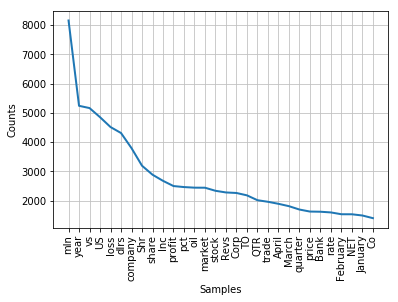

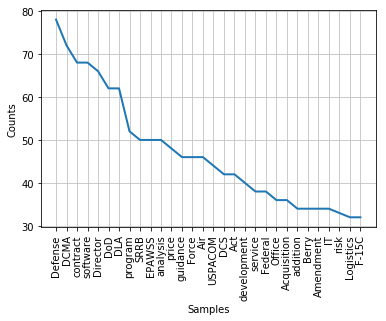

In [16]:
# plot to see what is going on
freq_base_tokens.plot(30)
freq_jargon.plot(30)

In [17]:
# now, what are the most common tokens from the jargon corpus?
freq_jargon.most_common(30)
freq_base_tokens.most_common(30)

[('mln', 8162),
 ('year', 5245),
 ('vs', 5168),
 ('US', 4856),
 ('loss', 4519),
 ('dlrs', 4315),
 ('company', 3798),
 ('Shr', 3197),
 ('share', 2890),
 ('Inc', 2680),
 ('profit', 2502),
 ('pct', 2467),
 ('oil', 2447),
 ('market', 2445),
 ('stock', 2340),
 ('Revs', 2283),
 ('Corp', 2265),
 ('TO', 2184),
 ('QTR', 2018),
 ('trade', 1964),
 ('April', 1895),
 ('March', 1814),
 ('quarter', 1699),
 ('price', 1630),
 ('Bank', 1624),
 ('rate', 1600),
 ('February', 1538),
 ('NET', 1537),
 ('January', 1495),
 ('Co', 1404)]

In [18]:
# you might also wish to calculate a probability distribution for the tokens. 
# you could use either the maximum likelihood estimator or the smoothed distribution
# so you need to set those distributions here (we discussed in class)
MLE_Dist_jargon = nltk.MLEProbDist(freq_jargon)
MLE_Dist_base = nltk.MLEProbDist(freq_base_tokens)
MLE_Dist_jargon.max()
MLE_Dist_base.max()

top200 = []
for token in freq_jargon.most_common(200):
    top200.append(token[0])

In [19]:
# once you have these probability distributions you will want to look in the jargon corpus and 
# find tokens that have a higher probability of occurence than in the base corpus 
# 找到在jargon集合中出现频率更高的词汇


high_probability_jargon = []
for token in jargon_tokens:
    # get its probability in the jargon corpus
    jargon_token_prob = MLE_Dist_jargon.prob(token)
 
    # get its probability base corpus
    base_token_prob = MLE_Dist_base.prob(token)
 
    # if the jargon corpus probability for the token is higher, then record the item as jargon
    # also, you could use a significance test with the probaility of jargon to see if they are 
    # from different distributions b
    if (jargon_token_prob > base_token_prob) and (token in top200):
        high_probability_jargon.append(token)

high_probability_jargon = set(high_probability_jargon)
print(high_probability_jargon)


{'surveillance', 'service', 'test', 'Antideficiency', 'Requirements', 'recommendation', 'Contract', 'Facilities', 'review', 'Amendment', 'deviation', 'Buy', 'capability', 'documentation', 'Berry', 'Laboratory', 'Center', 'IT', 'Logistics', 'Regulation', 'Assistant', 'transition', 'class', 'security', 'DoDHRA', 'Troop', 'training', 'Management', 'development', 'Navy', 'contracting', 'DCMA', 'Program', 'Background', 'period', 'clause', 'Reference', 'approval', 'Medical', 'EPAWSS', 'implementation', 'Objective', 'value', 'DISA', 'draft', 'ATO', 'CORs', 'DLA', 'House', 'purchase', 'SRRB', 'funding', 'risk', 'manager', 'Contracting', 'Acquisition', 'reasonableness', 'IGEs', 'revalidation', 'Hotline', 'option', 'Taken', 'software', 'program', 'May', 'F-15C', 'Finance', 'Administration', 'report', 'Procurement', 'American', 'revise', 'Federal', 'Secretary', 'Recommendations', 'issue', 'supply', 'management', 'guidance', 'contingency', 'Agency', 'volume', 'case', 'warfare', 'Business', 'use', 

# Analysis of Results

Below this cell, please put a short writeup of your approach and comments on your results. The goal here is to explain how well you think your method worked based on looking at some of your output data. Additionally, please describe things you might do fifferently or ways in which you might improve the process if you were given more time.

In [ ]:
Most punctuations are removed from the original text to make tokenization easier. However, some punctuations are kept in order to filter out words that include some combination of numbers and characters, for example "F-15C". Some stopwords are removed by using the nltk stopword list. On top of that, only noun are used for later procedures since jargons are mostly nouns. In the final list, only words with high frequencies are remained.

The tagging process might have some problem since some verbs are still kept in the final results. In addition, the result is far from perfect since there are many commmly used words kept in the final list. Maybe a larger dataset for comparison is needed to filter out some common words. Furthermore, a better tagging method is needed to correctly find the nouns. 
